In [1]:
from nltk.corpus import stopwords
#from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud
import pandas as pd
from operator import itemgetter

In [2]:
stop_li=stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [3]:
with open('pride&prejudice.txt',encoding='utf-8') as f:
    lines = f.readlines()

In [4]:
regex= r'[^A-Za-z0-9]'
li_pp=[]
for i in range(14579):
    lines[i]=re.sub(regex," ",lines[i])
    lines[i]=lines[i].replace("'","")
    #lines[i]=word_tokenize(lines[i].lower())

In [5]:
str=" ".join(lines)

In [6]:
li=str.split()

In [7]:
li_temp=[]
for i in li:
    li_temp.append(lemmatizer.lemmatize(i.lower()))

In [8]:
li_unique=set(li_temp)

In [9]:
print(li_temp.__len__())
print(li_unique.__len__())

126262
6059


In [10]:
corpus=[]
for i in li_unique:
    if i.isalpha()==True and i not in stop_li and len(i)>2:
        corpus.append([i,li_temp.count(i)])

In [11]:
corpus.__len__()

5824

In [12]:
corpus[:10]

[['oddity', 2],
 ['anne', 5],
 ['list', 3],
 ['scrupulous', 1],
 ['struggle', 4],
 ['mention', 30],
 ['never', 220],
 ['rejecting', 2],
 ['carriage', 50],
 ['triumphant', 2]]

In [13]:
corpus.sort(key=lambda x:x[1],reverse=True)

In [30]:
df=pd.DataFrame({"word":[],"freq":[]})
df["word"]=list(map(itemgetter(0), corpus ))
df["freq"]=list(map(itemgetter(1), corpus ))

In [38]:
df=df.drop(7)

In [40]:
df=df.reset_index()

In [41]:
df

,index,word,freq
0,0,elizabeth,635
1,3,darcy,418
2,4,said,401
3,5,bennet,333
4,8,bingley,306
...,...,...,...
5815,5819,indistinctly,1
5816,5820,womanly,1
5817,5821,honest,1
5818,5822,outdone,1


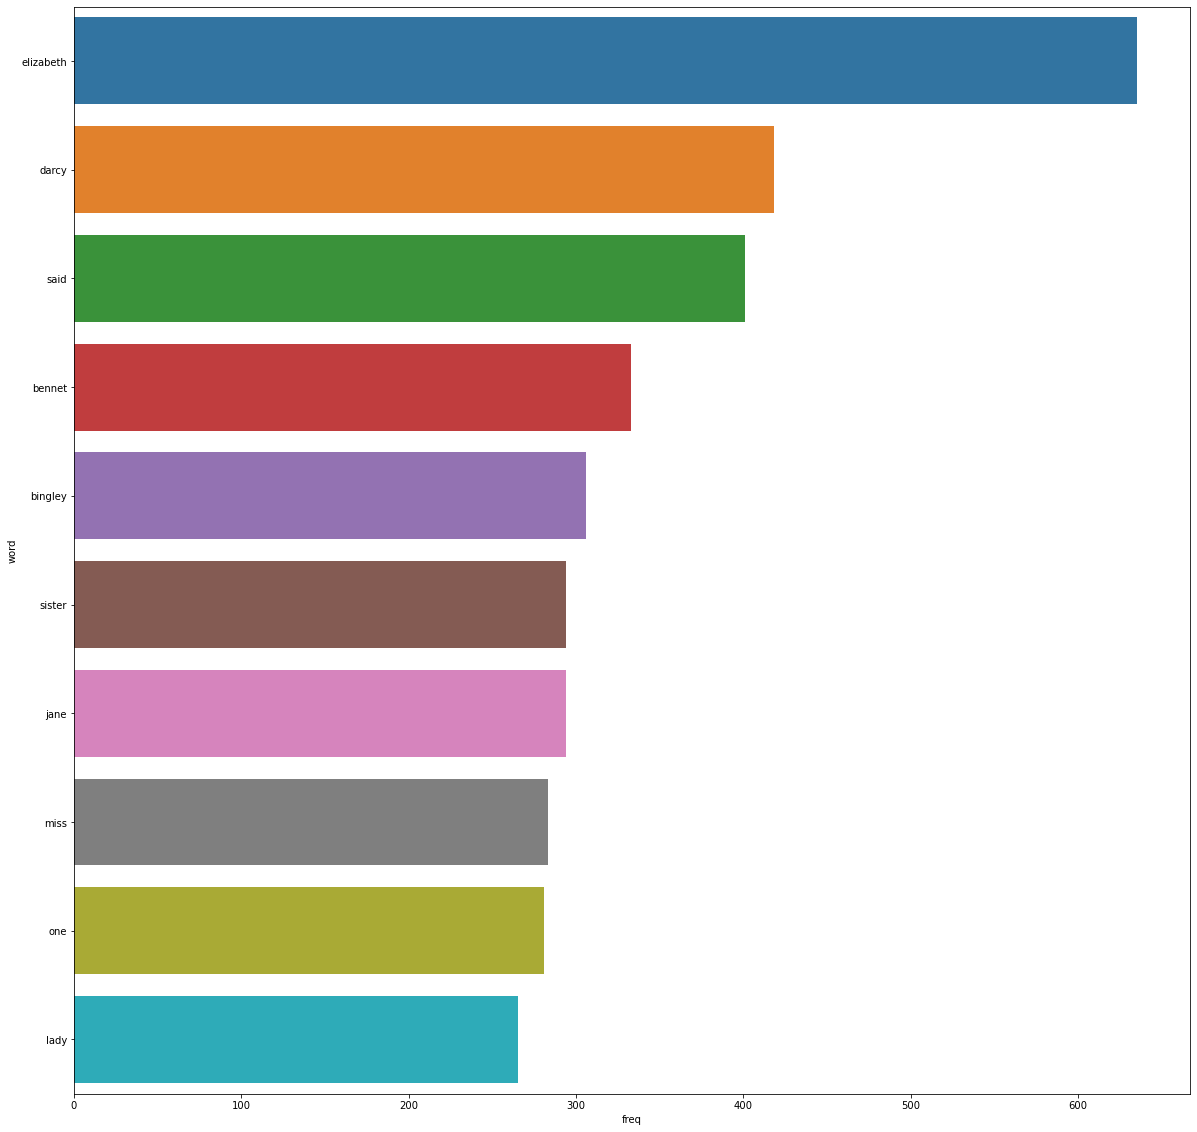

In [42]:
plt.figure(figsize=(20,20))
g=sns.barplot(x='freq',y='word',data=df.head(10))
g.figure.savefig("30mostfreq_ja.png")

<Figure size 432x288 with 0 Axes>

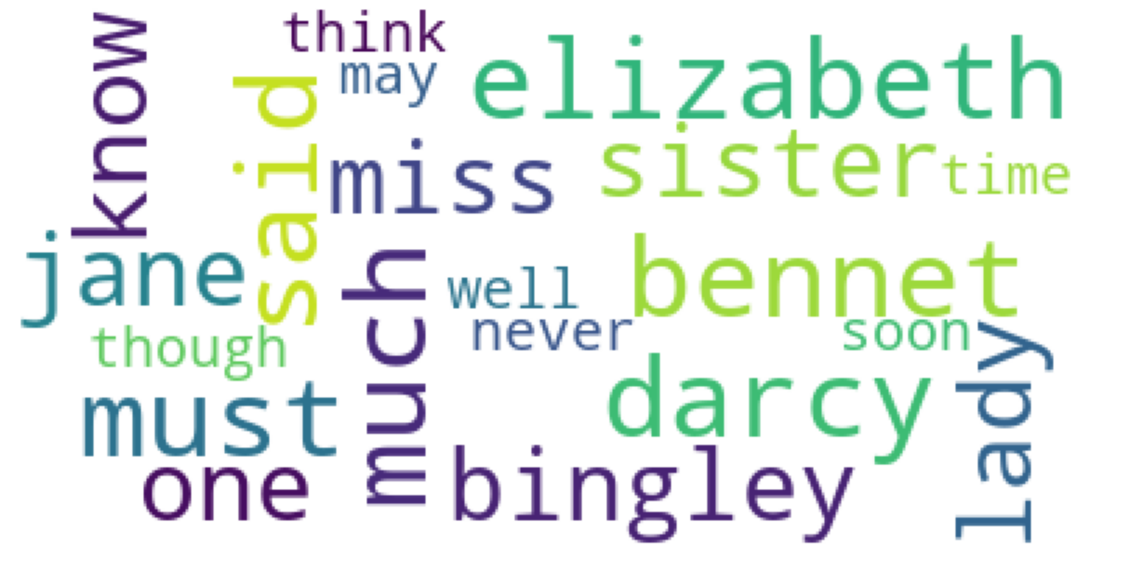

In [17]:
text = " ".join(df.loc[:25,"word"].values)
wordcloud = WordCloud(width=800, height=400).generate(text)
wordcloud = WordCloud(background_color="white",max_words=20,max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud)

plt.axis("off")
plt.show()


In [44]:
j=1
for i in range(df.shape[0]):
    df.loc[i,"rank"]=j
    j+=1

In [45]:
df

,index,word,freq,rank
0,0,elizabeth,635,1.0
1,3,darcy,418,2.0
2,4,said,401,3.0
3,5,bennet,333,4.0
4,8,bingley,306,5.0
...,...,...,...,...
5815,5819,indistinctly,1,5816.0
5816,5820,womanly,1,5817.0
5817,5821,honest,1,5818.0
5818,5822,outdone,1,5819.0


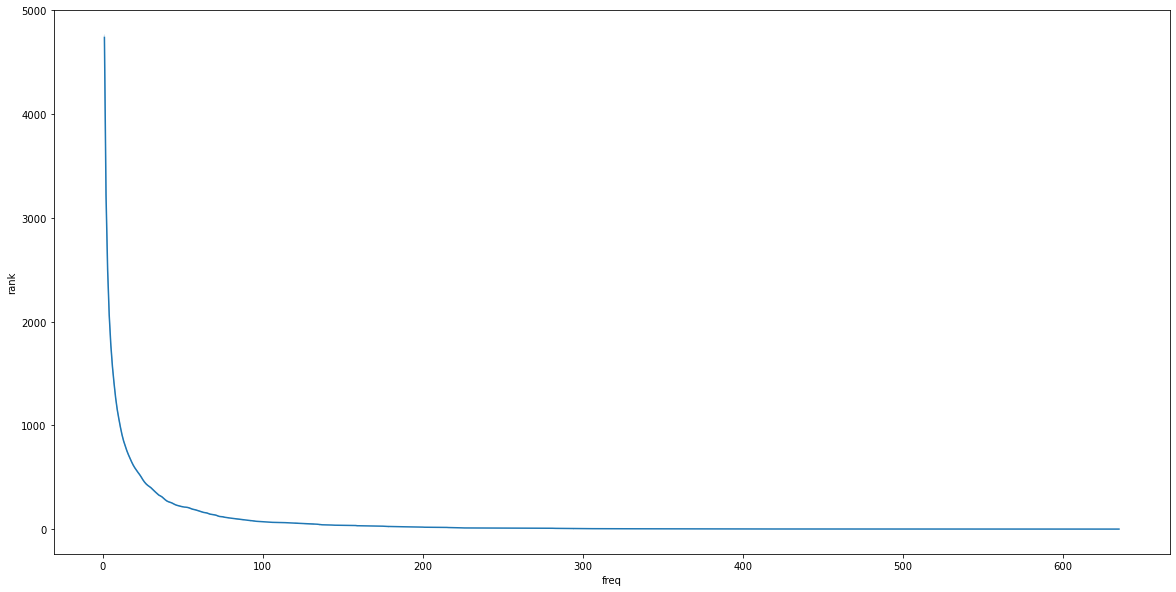

In [46]:
plt.figure(figsize=(20,10))
m=sns.lineplot(data=df, x="freq", y="rank")
m.figure.savefig("fvsp.png")

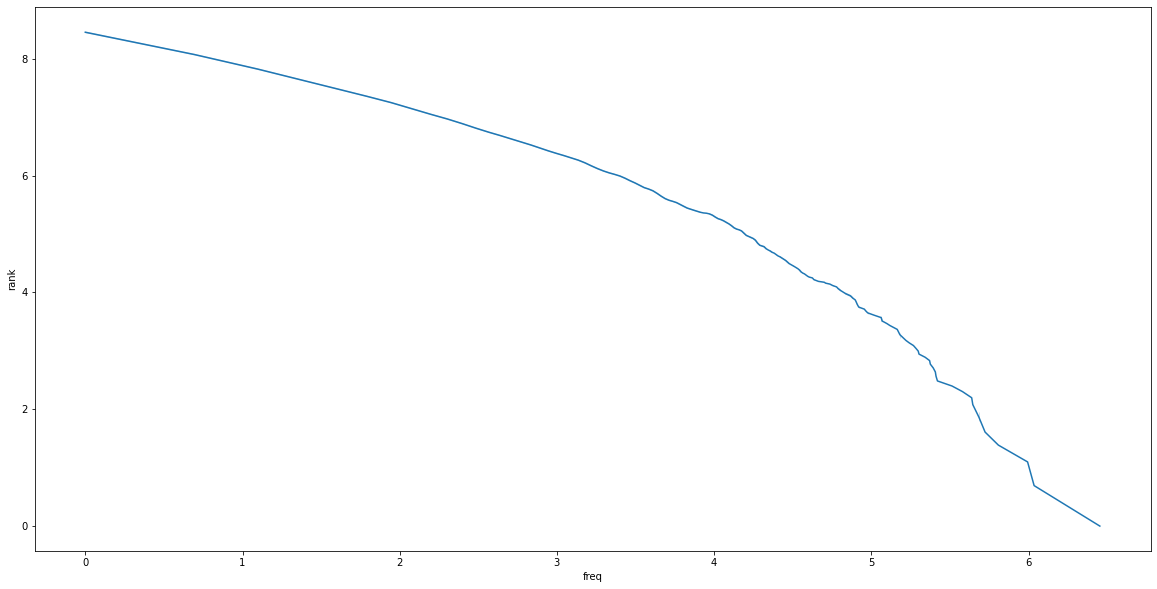

In [48]:
plt.figure(figsize=(20,10))
n=sns.lineplot(data=df, x=np.log(df["freq"]),y=np.log(df["rank"]))
n.figure.savefig("logfp.png")

In [49]:
X=np.log(df["freq"])
Y=np.log(df["rank"])
A = np.vstack([X, np.ones(len(X))]).T
y = Y[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print("Value of m for the best fit line is: {m}".format(m=alpha[0]))
print("Value of c for the best fit line is: {m}".format(m=alpha[1]))

Value of m for the best fit line is: [-0.77913435]
Value of c for the best fit line is: [8.57051316]


<ipython-input-49-57e610c551bf>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = Y[:, np.newaxis]


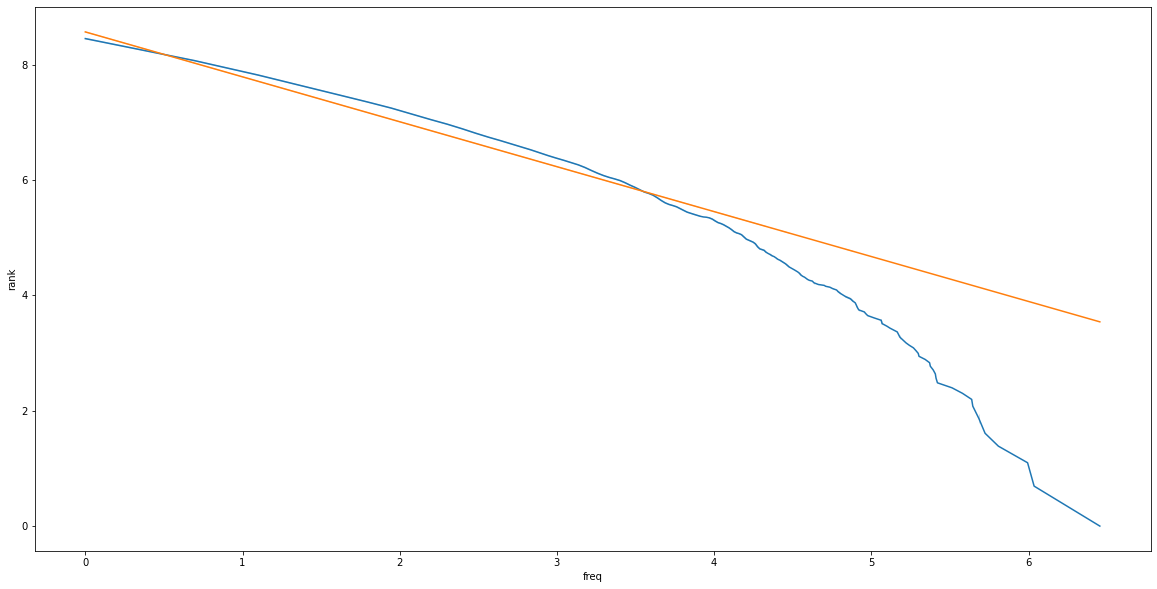

In [50]:
plt.figure(figsize=(20,10))
k=sns.lineplot(data=df, x=np.log(df["freq"]),y=np.log(df["rank"]))
k=sns.lineplot(x=X,y=alpha[0]*X + alpha[1])
k.figure.savefig("combined.png")